<a href="https://colab.research.google.com/github/Nazarique/meta-heur-sticas-bioinspiradas/blob/main/Lista_1/Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
pip install geneticalgorithm

     |████████████████████████████████| 51kB 2.3MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp36-none-any.whl size=15078 sha256=4780dbe624d31362c9a00dab2e2746667c6a841d97718248e053a75b21f096c9
  Stored in directory: /root/.cache/pip/wheels/46/7c/4f/24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout


In [ ]:
pip install chart-studio 

     |████████████████████████████████| 71kB 1.9MB/s 


link ->
[lib para genetico, existe alguns exemplos](https://pypi.org/project/geneticalgorithm/)

github da lib -> [texto do link](https://github.com/rmsolgi/geneticalgorithm)

In [ ]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

In [ ]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly import subplots
import numpy as np
from scipy.spatial import Delaunay
import chart_studio.plotly as py

#Funções Objetivo

##Função de Schwefel

Função de Schwefel: 𝑓(𝑥, 𝑦) = 418,9829𝑑 − ∑𝑑 𝑖=1 𝑥𝑖sin(√|𝑥𝑖|), com d=2 e domínio no intervalo
[-500;+500];

In [ ]:
def f_Schwefel(x):

  dim=len(x)
  z = 0 
  for i in range(0,dim):
      z += x[i] * np.sin( np.sqrt( np.abs( x[i])))
  z = (418.9829 * dim) - z    
  return z

##Função de Rastrigin

Função de Rastrigin: 𝑓(𝑥, 𝑦) = 20+𝑥2 + 𝑦2 − 10(cos2𝜋𝑥 + cos2𝜋𝑦), domínio no intervalo [-5;+5];

In [ ]:
def f_Rastrigin(x):

  dim=len(x)
  z = 0 
  for i in range(0,dim):
      z += (x[i]**2) - 10 * np.cos(2 * np.pi * x[i]) + 10
  return z

##F

𝑓(𝑥, 𝑦) = 𝑥. exp⁡(−(𝑥2 + 𝑦2))
$$ 𝑓(𝑥, 𝑦) = 𝑥 e^{−(𝑥^2 + 𝑦^2)}$$
 domínio no intervalo [-2;+2]

In [ ]:
def f_func(x):

  dim=len(x)
  z = 0 
  for i in range(0,dim):
      z += x[i]**2
  z = x[0]*np.exp(-z)       
  return -z



# Algoritmo Genético Aplicado às Funções

##*4* Topologias para cada função

1.   Crossover = um ponto/ Seleção = 0.01 de taxa de Elite
2.   Crossover = um ponto/ Seleção = 0.20 de  taxa de Elite 
3.   Crossover = uniforme/ Seleção = 0.01 de taxa de Elite  
4.   Crossover = uniforme/ Seleção = 0.20 de taxa de Elite 


In [ ]:
tabela0 = go.Figure(data=[go.Table(header=dict(values=['Topologia', 'Crossover','Seleção - taxa de Elite']),
                 cells=dict(values=[[1, 2, 3, 4], 
                                    [' Um Ponto', 'Um Ponto','Uniforme','Uniforme'],
                                    ['0.01', '0.20','0.01','0.20']                                    
                                    ]), columnwidth=[30,50,50])])

tabela0.update_layout(width=500, height=210,
    yaxis_title='Número de Iterações',
    xaxis_title='Topologias - GA',
    title='Variação de Topologias',
    template="simple_white",
    yaxis=dict(showgrid=True,), 
    xaxis=dict(showgrid=True,),
    margin=dict(l=30, r=30, b=50, t=50,),
    paper_bgcolor='rgb(223, 223, 223)',
    plot_bgcolor='rgb(223, 223, 223)',
    showlegend=True,
    annotations=[dict(text="Source: Furquim e Nazário",
                      showarrow=False,
                      xref="paper",
                      yref="paper",
                      x=1,
                      y=-0.15)])


tabela0.show()

In [ ]:
def ga_f(rodadas, cross, elite, func, intervalo = [-2,2], dimension= 2):
  dimension = dimension
  varbound=np.array([intervalo]*dimension)
  
  f=list()


  resultado_F=[]

  for i in range (0,rodadas):

    resultado_F = list()

    algorithm_param = {'max_num_iteration': 500,
                        'population_size':100,
                        'mutation_probability':0.1,
                        'elit_ratio': elite,
                        'crossover_probability': 0.5,
                        'parents_portion': 0.3,
                        'crossover_type':cross,
                        'max_iteration_without_improv':10}
                        
    model = ga(function=func, dimension=dimension, variable_type='real', variable_boundaries=varbound,
                algorithm_parameters=algorithm_param)
    model.run()
    resultado_F.append(model.__dict__['output_dict'])

    print('é esse aqui: '+str(model.__dict__['output_dict']))
    resultado_F.append( 
        model.report.index(
            model.__dict__['output_dict']['function']
        ))
    f.append(resultado_F)  

        
  return f


## Função de Schwefel

 The best solution found:
 [423.0474314  417.18805293]

 Objective function:
 2.3452733608633025


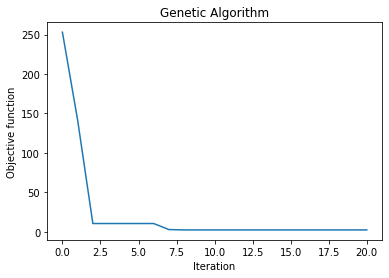


 The best solution found:
 [420.8767328  418.09674477]

 Objective function:
 1.040322576852759


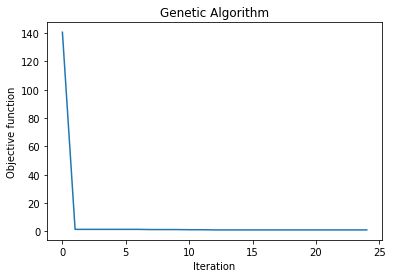


 The best solution found:
 [396.85667296 393.83245831]

 Objective function:
 159.04715978139438


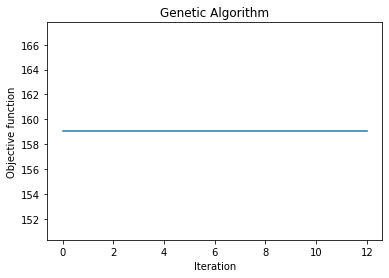


 The best solution found:
 [414.23988928 419.41285196]

 Objective function:
 5.990712959738175


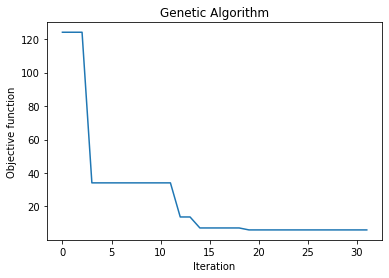


 The best solution found:
 [425.85884903 422.94131274]

 Objective function:
 3.5107836517258875


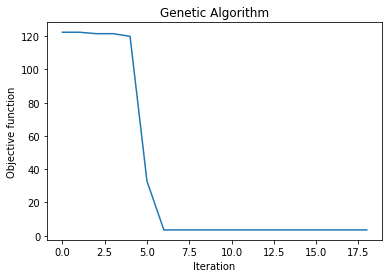


 The best solution found:
 [422.71484719 425.19353254]

 Objective function:
 2.6388132873058794


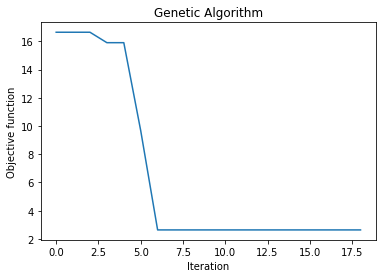


 The best solution found:
 [421.50884848 421.08211001]

 Objective function:
 0.03846329482098554


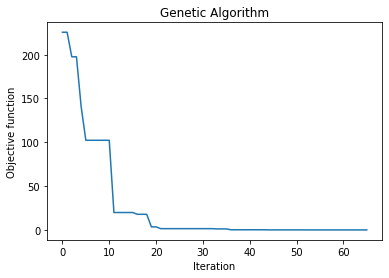


 The best solution found:
 [423.00849389 422.02703249]

 Objective function:
 0.6666944794824303


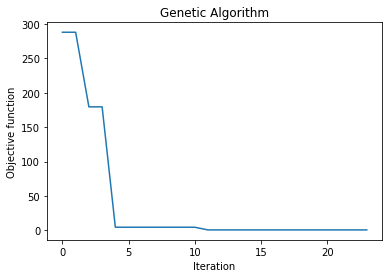


 The best solution found:
 [422.00530669 418.16550953]

 Objective function:
 1.1257565321093352


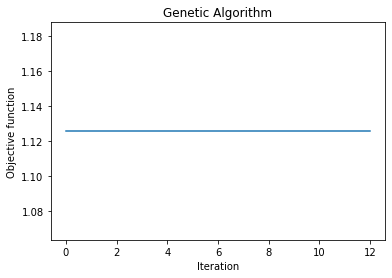


 The best solution found:
 [420.88780173 420.30592623]

 Objective function:
 0.056273101505894374


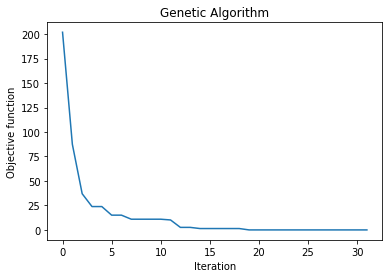


 The best solution found:
 [420.11500882 427.4503754 ]

 Objective function:
 5.395189826018395


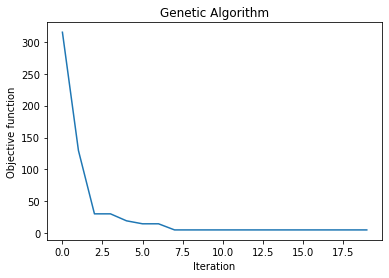


 The best solution found:
 [422.45852671 420.63235128]

 Objective function:
 0.29448943453098764


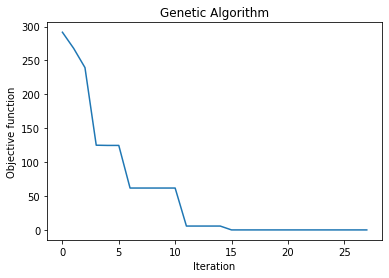


 The best solution found:
 [422.89289437 434.12618277]

 Objective function:
 22.23439458767325


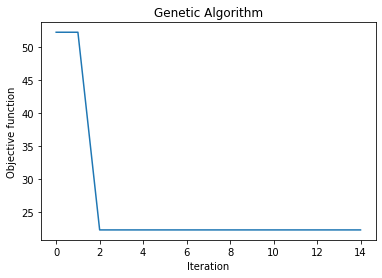


 The best solution found:
 [420.83151583 420.98014914]

 Objective function:
 0.002418050127062088


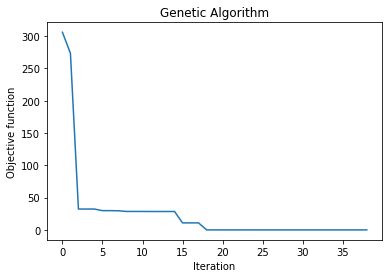


 The best solution found:
 [425.59786593 421.89362555]

 Objective function:
 2.813861969071354


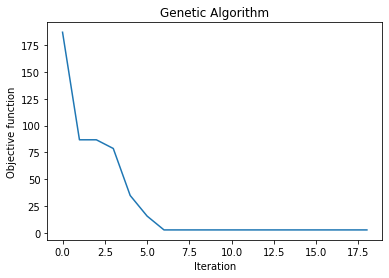


 The best solution found:
 [419.89880413 428.84497485]

 Objective function:
 7.971627636206563


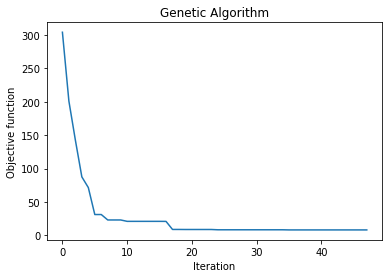


 The best solution found:
 [423.72260422 421.01167735]

 Objective function:
 0.9578498218553477


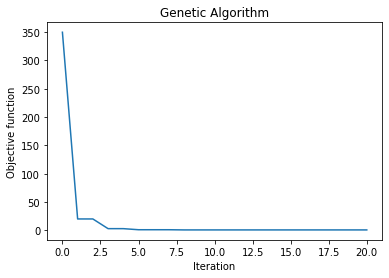


 The best solution found:
 [420.86926883 425.69929286]

 Objective function:
 2.8269886733257863


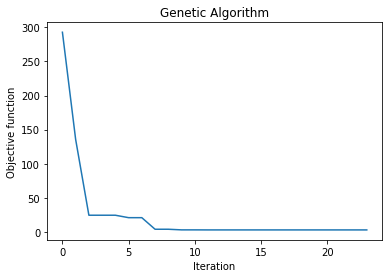


 The best solution found:
 [420.95086093 420.9229079 ]

 Objective function:
 0.0003309471496777405


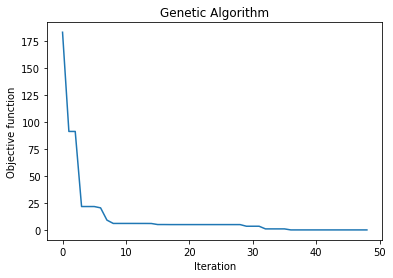


 The best solution found:
 [420.90979152 420.51190824]

 Objective function:
 0.02679374942101731


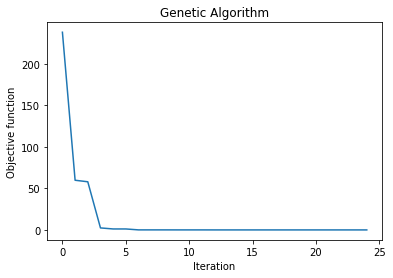


 The best solution found:
 [420.15880789 420.9150601 ]

 Objective function:
 0.08313704389036047


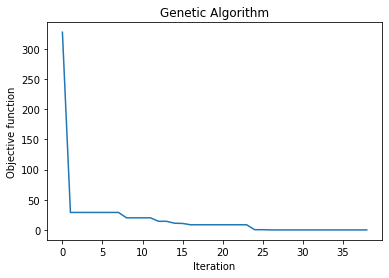


 The best solution found:
 [420.23678448 421.92245104]

 Objective function:
 0.18241714560326727


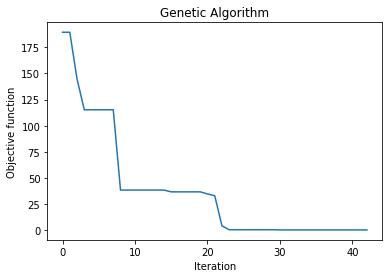


 The best solution found:
 [420.76294569 420.50811702]

 Objective function:
 0.032137900429120236


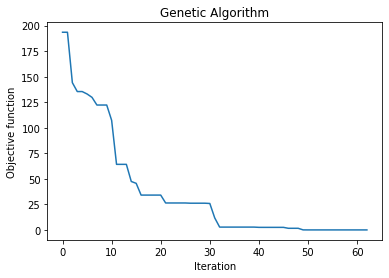


 The best solution found:
 [428.06905678 404.31754273]

 Objective function:
 40.635378863763094


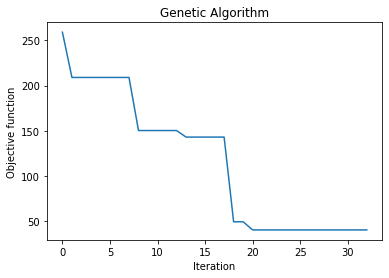


 The best solution found:
 [420.55747272 420.95150498]

 Objective function:
 0.021402846168143697


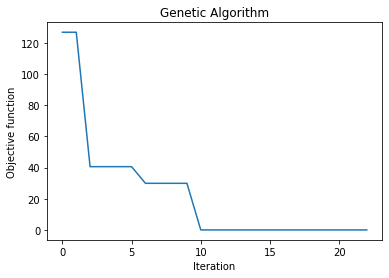


 The best solution found:
 [-308.19212685  423.81257536]

 Objective function:
 123.53005904411725


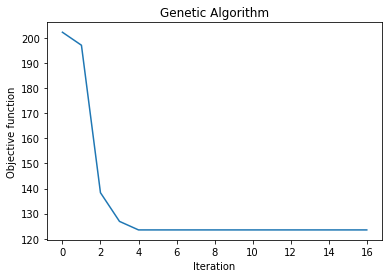


 The best solution found:
 [420.89728704 421.48056653]

 Objective function:
 0.03373088255852963


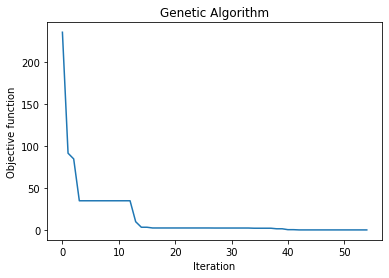


 The best solution found:
 [420.65611253 420.59695871]

 Objective function:
 0.029796313946917508


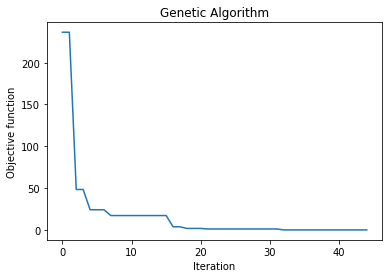


 The best solution found:
 [420.9566024  420.99428808]

 Objective function:
 0.0001263843976175849


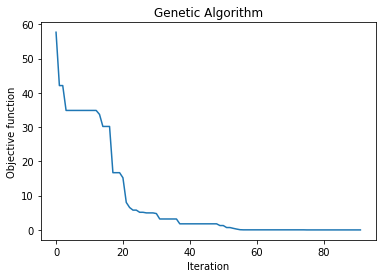


 The best solution found:
 [420.77067364 423.94250013]

 Objective function:
 1.1216246126205078


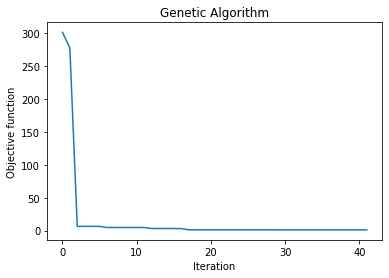


 The best solution found:
 [415.81531618 420.76753621]

 Objective function:
 3.345165272819713


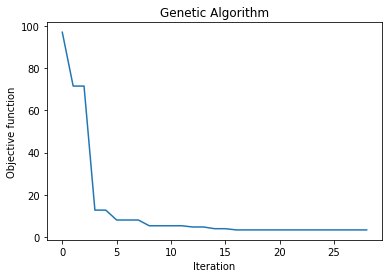


 The best solution found:
 [419.15041075 421.53773391]

 Objective function:
 0.45773011827429855


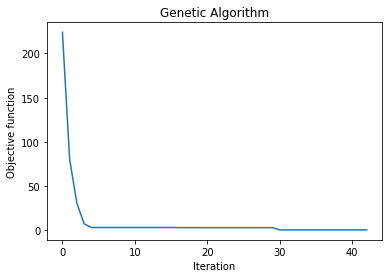


 The best solution found:
 [418.53682973 420.89729757]

 Objective function:
 0.7460260003832673


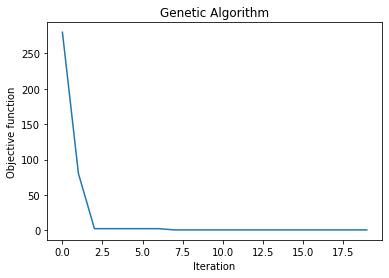


 The best solution found:
 [420.96128137 417.97237163]

 Objective function:
 1.1311227652697653


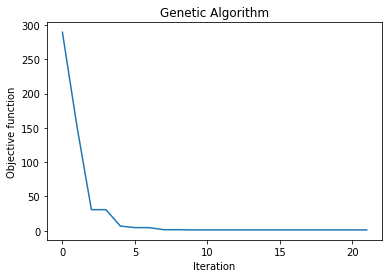


 The best solution found:
 [420.96896069 420.63107878]

 Objective function:
 0.014410878582339137


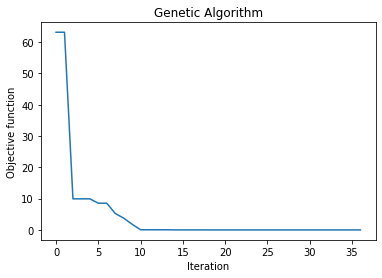


 The best solution found:
 [414.92695925 420.47314626]

 Objective function:
 4.617929577226732


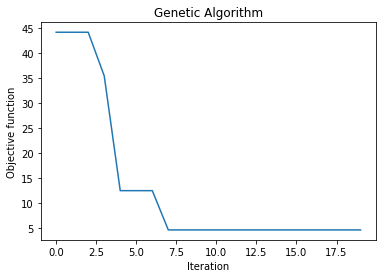


 The best solution found:
 [420.4866327  420.33097973]

 Objective function:
 0.0806599959067853


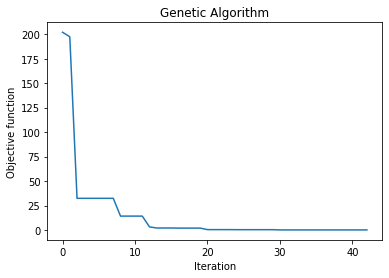


 The best solution found:
 [422.25297933 421.09157367]

 Objective function:
 0.21012353699143205


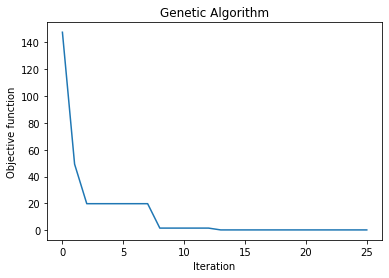


 The best solution found:
 [420.99631968 420.81673798]

 Objective function:
 0.003036883801996737


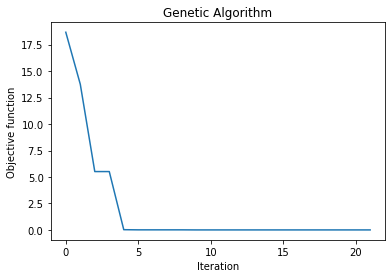


 The best solution found:
 [421.92906345 422.19325059]

 Objective function:
 0.3057064470488058


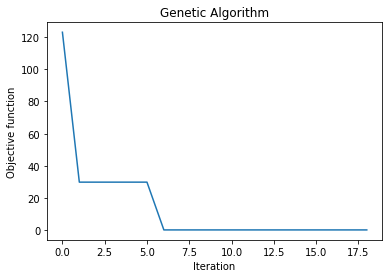

In [ ]:
rodadas   = 10
intervalo = [-500,500]
  # a = ['one_point','uniform']
  # b = [0,0.01]
funcao_func_1_1 = ga_f(rodadas,func=f_Schwefel, cross='one_point', elite=0.01, intervalo=intervalo ) 

funcao_func_1_2 = ga_f(rodadas,func=f_Schwefel, cross='one_point', elite=0.20, intervalo=intervalo ) 

funcao_func_1_3 = ga_f(rodadas,func=f_Schwefel, cross='uniform', elite=0.01, intervalo=intervalo ) 

funcao_func_1_4 = ga_f(rodadas,func=f_Schwefel, cross='uniform', elite=0.20, intervalo=intervalo ) 

In [ ]:
bunda            = [funcao_func_1_1, funcao_func_1_2, funcao_func_1_3, funcao_func_1_4]
n                = 0
dados_box_1_1    = []
dados_bolinha_1  = []
dados_tabela_1   = []
interacoes_1     = []
for fut in bunda: 
  n            += 1
  b             = list()
  dados_box_1   = []

  for i in range(0, rodadas):
    b.append(fut[i][0]['function'])
    dados_box_1.append(fut[i][1])
    #print('\niterações para convergir: '+str(fut[i][1])+'\tda rodada n: '+str(i+1))
  
  print('\nTopologia: '+str(n))
  print('todos os melhores Z(x,y): '+str(b)+'\n')
  print('indice do valor min: '+str(b.index(min(b))))
  print('\nx, y, z min: '+str(fut[b.index(min(b))][0])+'\n')
  print('interações para convergir em cada rodada: '+str(dados_box_1))
  print(100*'-'+3*'\n')
  dados_box_1_1.append(dados_box_1)
  dados_bolinha_1.append(fut[b.index(min(b))][0]['variable'])
  dados_tabela_1.append(fut[b.index(min(b))][0]['function'])
  interacoes_1.append(dados_box_1)


Topologia: 1
todos os melhores Z(x,y): [2.3452733608633025, 1.040322576852759, 159.04715978139438, 5.990712959738175, 3.5107836517258875, 2.6388132873058794, 0.03846329482098554, 0.6666944794824303, 1.1257565321093352, 0.056273101505894374]

indice do valor min: 6

x, y, z min: {'variable': array([421.50884848, 421.08211001]), 'function': 0.03846329482098554}

interações para convergir em cada rodada: [8, 12, 0, 19, 6, 6, 53, 11, 0, 19]
----------------------------------------------------------------------------------------------------




Topologia: 2
todos os melhores Z(x,y): [5.395189826018395, 0.29448943453098764, 22.23439458767325, 0.002418050127062088, 2.813861969071354, 7.971627636206563, 0.9578498218553477, 2.8269886733257863, 0.0003309471496777405, 0.02679374942101731]

indice do valor min: 8

x, y, z min: {'variable': array([420.95086093, 420.9229079 ]), 'function': 0.0003309471496777405}

interações para convergir em cada rodada: [7, 15, 2, 26, 6, 35, 8, 11, 36, 12]
-------

## Função de Rastrigin

 The best solution found:
 [0.00662721 0.0123466 ]

 Objective function:
 0.038939637011933925


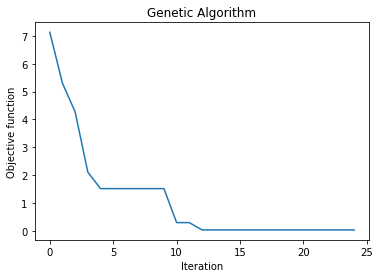


 The best solution found:
 [-0.0061969  -0.04417392]

 Objective function:
 0.3922808027121025


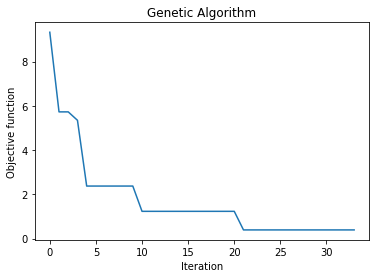


 The best solution found:
 [-0.05350207 -0.00444145]

 Objective function:
 0.5665041094992418


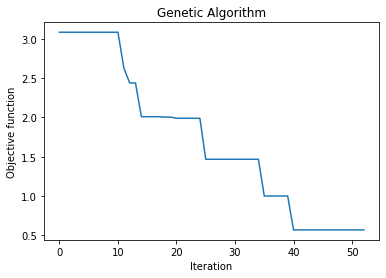


 The best solution found:
 [ 8.63791091e-05 -1.73023985e-02]

 Objective function:
 0.05933653501657865


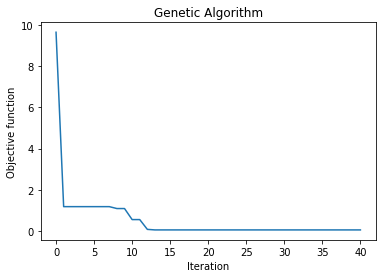


 The best solution found:
 [-0.01711681  0.02214543]

 Objective function:
 0.1552096279828774


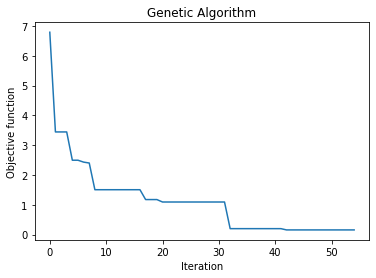


 The best solution found:
 [-0.06472767 -0.99527708]

 Objective function:
 1.8148404302766874


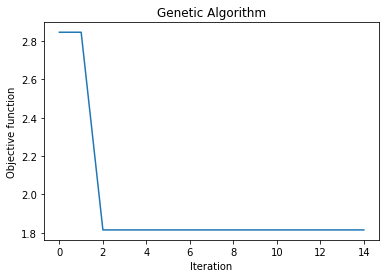


 The best solution found:
 [0.02371921 0.00496085]

 Objective function:
 0.11629224543002437


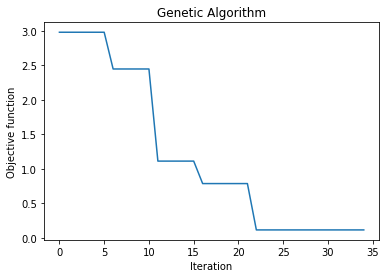


 The best solution found:
 [ 0.01602382 -0.01048131]

 Objective function:
 0.07268396931505272


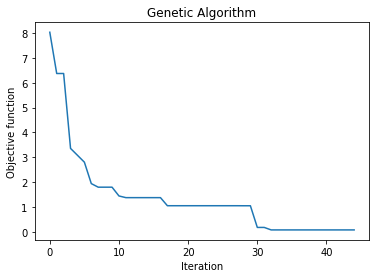


 The best solution found:
 [-0.02940908 -0.0659886 ]

 Objective function:
 1.022757034493127


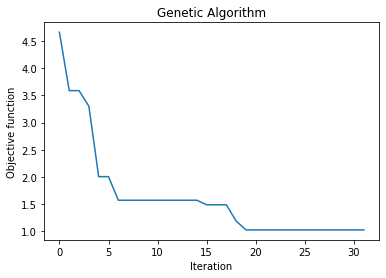


 The best solution found:
 [1.00056428 0.00636827]

 Objective function:
 1.0092364314906934


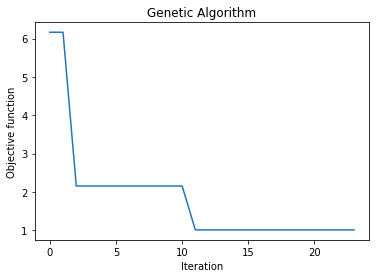


 The best solution found:
 [-0.99598008  0.02093577]

 Objective function:
 1.0819978449260095


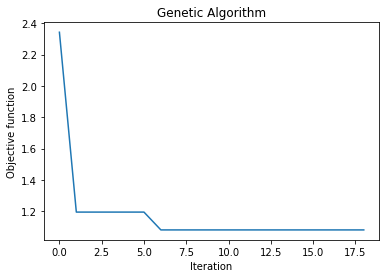


 The best solution found:
 [0.98959604 1.00165555]

 Objective function:
 2.004513780507926


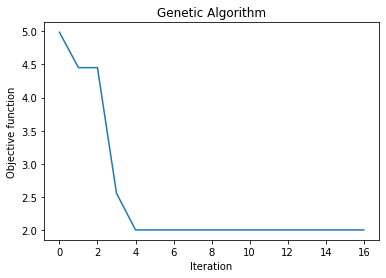


 The best solution found:
 [-0.00781506  0.00126181]

 Objective function:
 0.012430282954358773


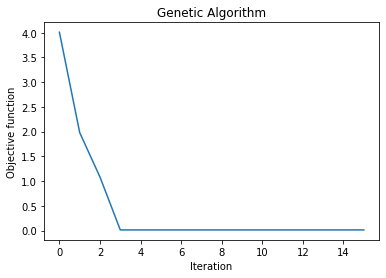


 The best solution found:
 [-0.00070728  0.00054671]

 Objective function:
 0.00015854132443315905


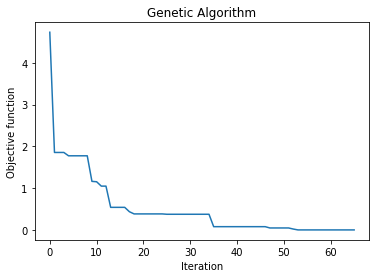


 The best solution found:
 [-0.04965739 -0.99581627]

 Objective function:
 1.4803754244845369


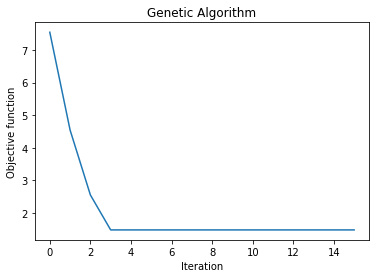


 The best solution found:
 [ 4.50275031e-03 -6.47656343e-05]

 Objective function:
 0.00402291727920101


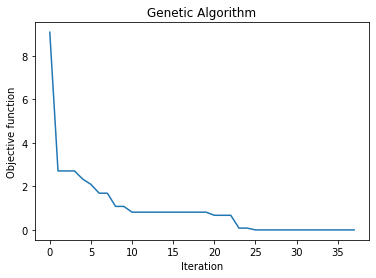


 The best solution found:
 [-0.00756269  1.01833726]

 Objective function:
 1.1146562462520997


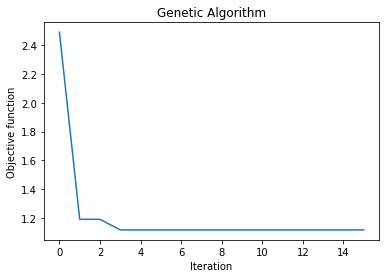


 The best solution found:
 [-2.29454161e-05  1.83615922e-03]

 Objective function:
 0.0006689721632628931


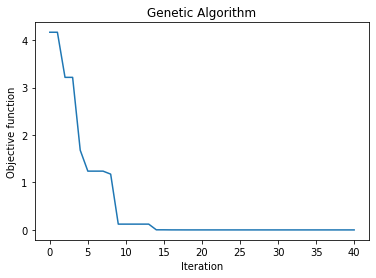


 The best solution found:
 [0.00067572 0.00200314]

 Objective function:
 0.0008866333947477045


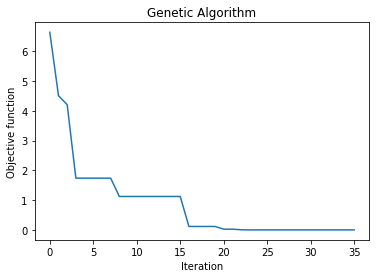


 The best solution found:
 [0.00413778 0.00329847]

 Objective function:
 0.00555493751281233


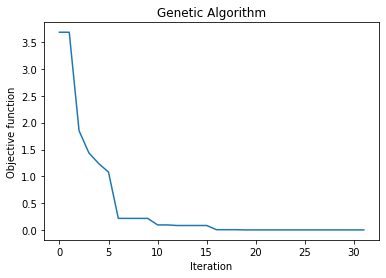


 The best solution found:
 [4.97516113e-05 1.76286375e-07]

 Objective function:
 4.910707858130081e-07


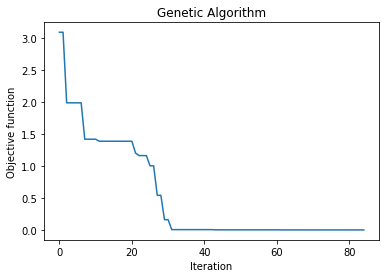


 The best solution found:
 [-0.04048185  0.00116857]

 Objective function:
 0.32365168857090687


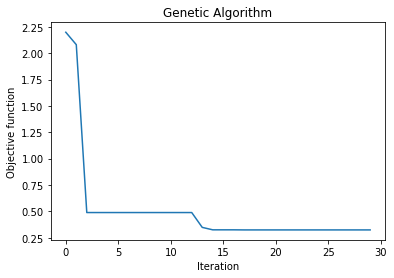


 The best solution found:
 [-0.02583944  0.00025087]

 Objective function:
 0.13218505312174678


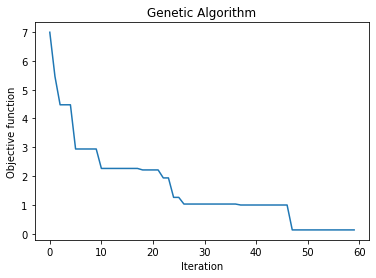


 The best solution found:
 [-0.00334746 -0.0484634 ]

 Objective function:
 0.46461544985394987


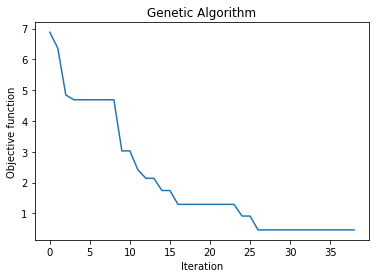


 The best solution found:
 [0.05466085 0.00343291]

 Objective function:
 0.5893212002236972


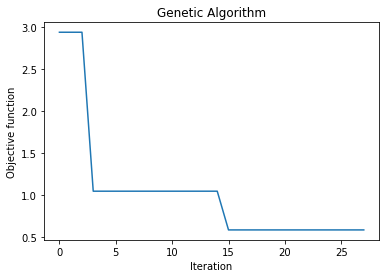


 The best solution found:
 [0.01465431 0.00107164]

 Objective function:
 0.04280236451322672


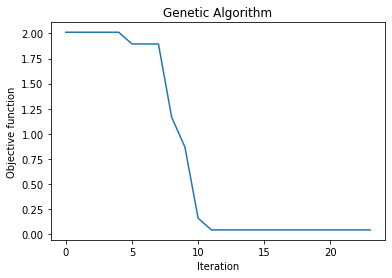


 The best solution found:
 [-0.00384369  0.04386106]

 Objective function:
 0.3821988558088041


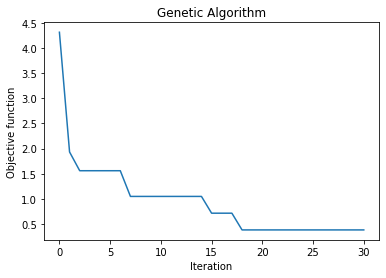


 The best solution found:
 [-0.00677252  0.00712681]

 Objective function:
 0.019173215483569095


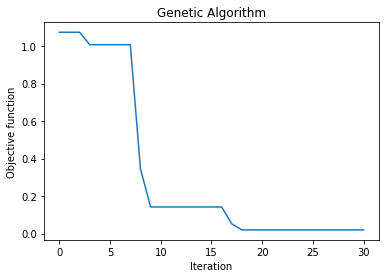


 The best solution found:
 [-0.00602246 -0.00594814]

 Objective function:
 0.014213217356312313


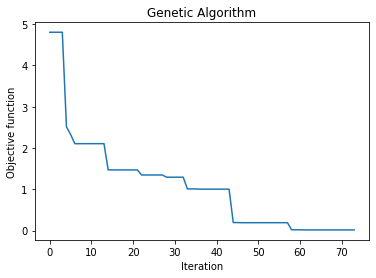


 The best solution found:
 [-0.01635314 -0.00686438]

 Objective function:
 0.06235536660236285


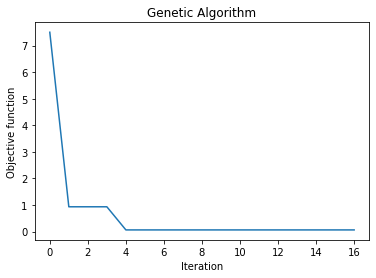


 The best solution found:
 [ 0.03279264 -0.99869688]

 Objective function:
 1.2103230661918847


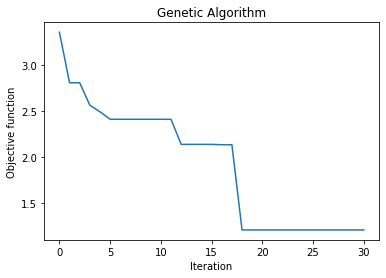


 The best solution found:
 [0.00393688 0.99126602]

 Objective function:
 1.00073681320608


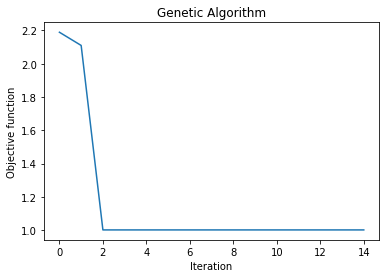


 The best solution found:
 [-0.01700861 -1.0490613 ]

 Objective function:
 1.6292431297336076


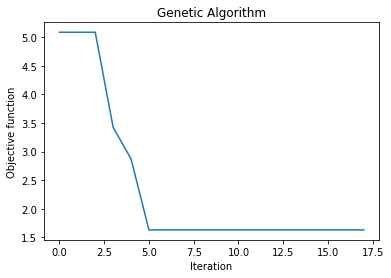


 The best solution found:
 [-0.0038306 -0.9950371]

 Objective function:
 0.9978712425310476


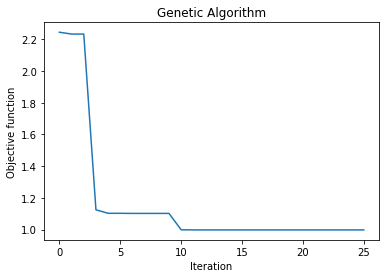


 The best solution found:
 [-0.00178303 -0.00406476]

 Objective function:
 0.003908438956125693


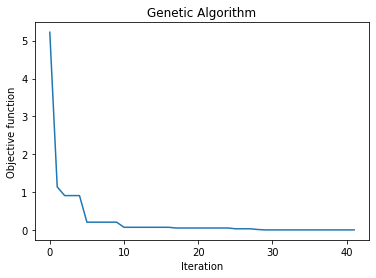


 The best solution found:
 [ 0.99490716 -0.01294488]

 Objective function:
 1.028185876145665


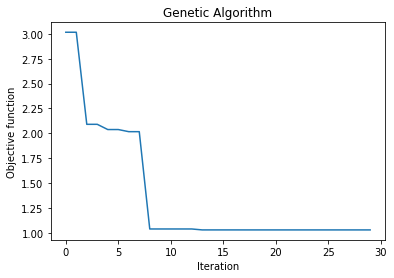


 The best solution found:
 [-4.13269577e-03  6.32453407e-06]

 Objective function:
 0.003388191569099419


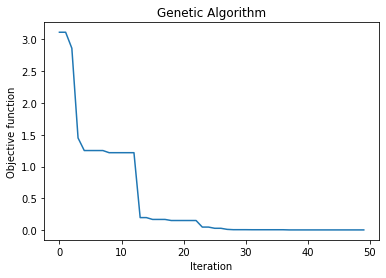


 The best solution found:
 [ 0.06288336 -0.00629732]

 Objective function:
 0.7822700772504252


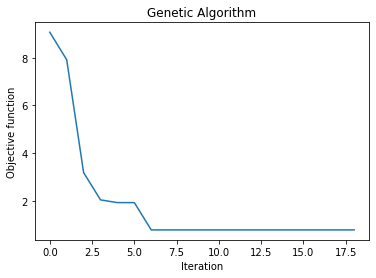


 The best solution found:
 [0.00026784 0.0173901 ]

 Objective function:
 0.05995174782990276


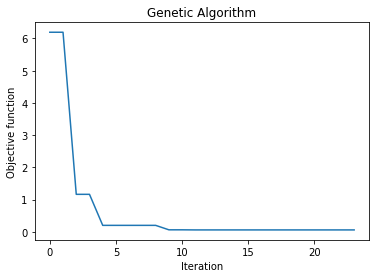


 The best solution found:
 [0.0137121  0.06332753]

 Objective function:
 0.8225165770603411


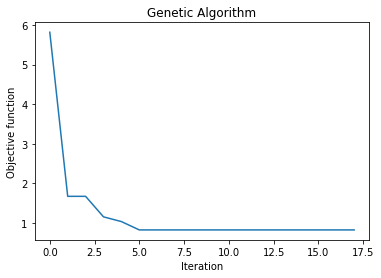

In [ ]:
rodadas   = 10
intervalo = [-5,5]
  # a = ['one_point','uniform']
  # b = [0,0.01]
funcao_func_2_1 = ga_f(rodadas,func=f_Rastrigin, cross='one_point', elite=0.01, intervalo=intervalo ) 

funcao_func_2_2 = ga_f(rodadas,func=f_Rastrigin, cross='one_point', elite=0.20, intervalo=intervalo ) 

funcao_func_2_3 = ga_f(rodadas,func=f_Rastrigin, cross='uniform', elite=0.01, intervalo=intervalo ) 

funcao_func_2_4 = ga_f(rodadas,func=f_Rastrigin, cross='uniform', elite=0.20, intervalo=intervalo ) 

In [ ]:
bundinha        = [funcao_func_2_1, funcao_func_2_2, funcao_func_2_3, funcao_func_2_4]
n               = 0
dados_box_2_1   = []
dados_bolinha_2 = []
dados_tabela_2  = []
interacoes_2    = []
for fut in bundinha: 
  n            +=1
  b             = list()
  dados_box_2   = []

  for i in range(0, rodadas):   
    b.append(fut[i][0]['function'])
    dados_box_2.append(fut[i][1])
    #print('\niterações para convergir: '+str(fut[i][1])+'\tda rodada n: '+str(i+1))
  
  print('\nTopologia: '+str(n))
  print('todos os melhores Z(x,y): '+str(b)+'\n')
  print('indice do valor min: '+str(b.index(min(b))))
  print('\nx, y, z min: '+str(fut[b.index(min(b))][0])+'\n')
  dados_box_2_1.append(dados_box_2)
  print('interações para convergir em cada rodada: '+str(dados_box_2))
  print(100*'-'+3*'\n')
  dados_tabela_2.append(fut[b.index(min(b))][0]['function'])
  dados_bolinha_2.append(fut[b.index(min(b))][0]['variable'])
  interacoes_2.append(dados_box_2)




Topologia: 1
todos os melhores Z(x,y): [0.038939637011933925, 0.3922808027121025, 0.5665041094992418, 0.05933653501657865, 0.1552096279828774, 1.8148404302766874, 0.11629224543002437, 0.07268396931505272, 1.022757034493127, 1.0092364314906934]

indice do valor min: 0

x, y, z min: {'variable': array([0.00662721, 0.0123466 ]), 'function': 0.038939637011933925}

interações para convergir em cada rodada: [12, 21, 40, 28, 42, 2, 22, 32, 19, 11]
----------------------------------------------------------------------------------------------------




Topologia: 2
todos os melhores Z(x,y): [1.0819978449260095, 2.004513780507926, 0.012430282954358773, 0.00015854132443315905, 1.4803754244845369, 0.00402291727920101, 1.1146562462520997, 0.0006689721632628931, 0.0008866333947477045, 0.00555493751281233]

indice do valor min: 3

x, y, z min: {'variable': array([-0.00070728,  0.00054671]), 'function': 0.00015854132443315905}

interações para convergir em cada rodada: [6, 4, 3, 53, 3, 25, 3, 28, 23,

##$$ 𝑓(𝑥, 𝑦) = 𝑥 e^{−(𝑥^2 + 𝑦^2)}$$

 The best solution found:
 [0.68875958 0.00885696]

 Objective function:
 -0.42855713440213233


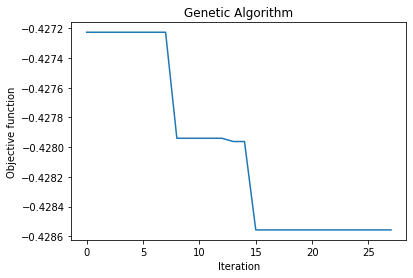


 The best solution found:
 [0.74876252 0.0119115 ]

 Objective function:
 -0.4273633869011372


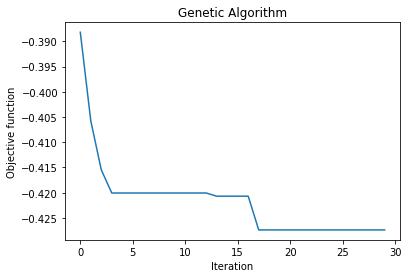


 The best solution found:
 [ 7.21294409e-01 -6.81561011e-04]

 Objective function:
 -0.42871025703807913


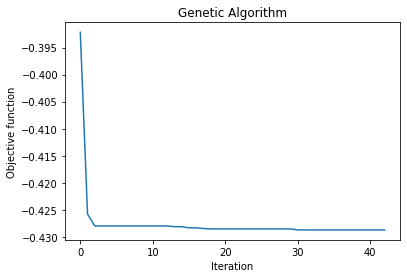


 The best solution found:
 [ 0.67480739 -0.02558687]

 Objective function:
 -0.42769383505522124


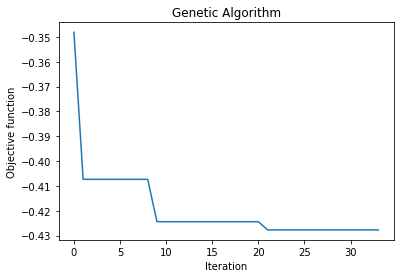


 The best solution found:
 [0.71421163 0.00788085]

 Objective function:
 -0.42881215624171326


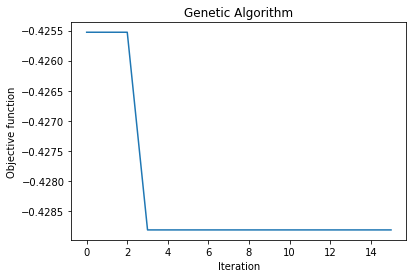


 The best solution found:
 [0.7105101  0.01042095]

 Objective function:
 -0.42882545197016775


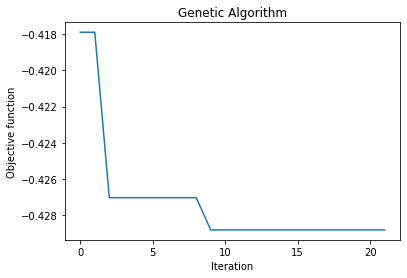


 The best solution found:
 [ 0.70637205 -0.00518429]

 Objective function:
 -0.42886995246111675


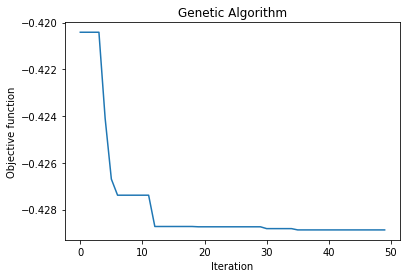


 The best solution found:
 [ 0.68607778 -0.00778401]

 Objective function:
 -0.4284729858189632


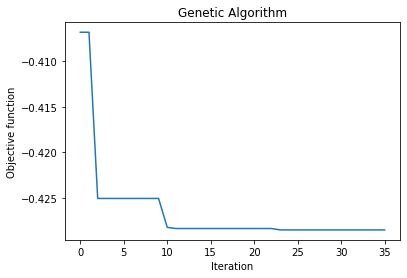


 The best solution found:
 [0.71187109 0.00161072]

 Objective function:
 -0.4288614037280015


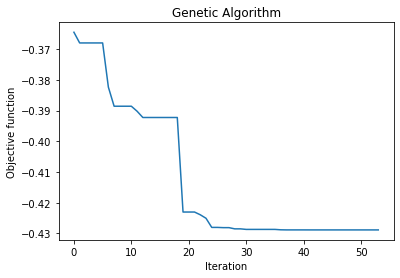


 The best solution found:
 [ 0.72155457 -0.02528628]

 Objective function:
 -0.42843010780775526


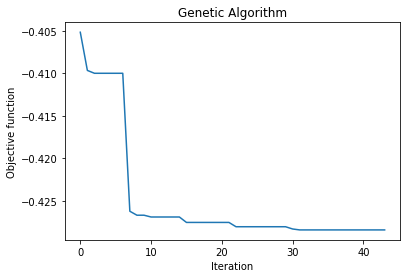


 The best solution found:
 [7.09189722e-01 2.20922382e-05]

 Objective function:
 -0.4288782244016034


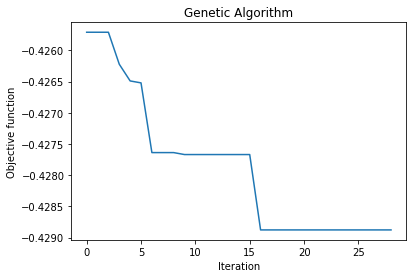


 The best solution found:
 [ 7.11328531e-01 -6.85490243e-04]

 Objective function:
 -0.4288664834460847


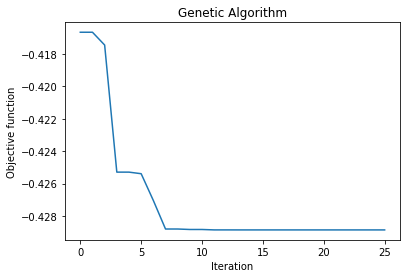


 The best solution found:
 [ 0.70802981 -0.00145566]

 Objective function:
 -0.428880303225849


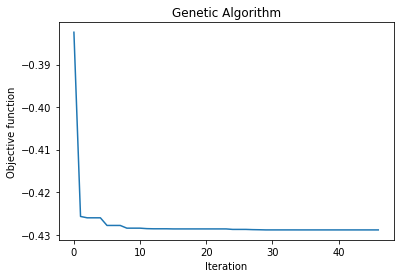


 The best solution found:
 [ 0.68998106 -0.02777104]

 Objective function:
 -0.42829793101701497


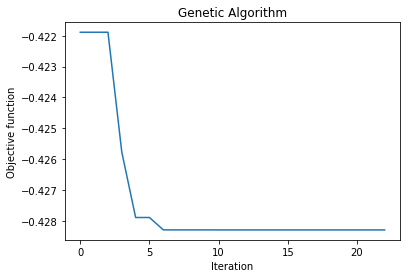


 The best solution found:
 [ 6.93122460e-01 -3.18734361e-07]

 Objective function:
 -0.4287131078536027


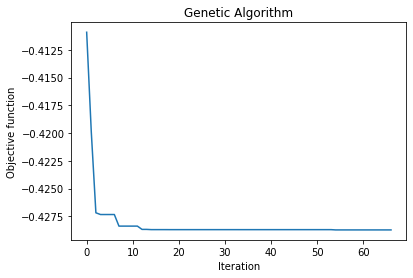


 The best solution found:
 [0.70765656 0.00187332]

 Objective function:
 -0.42888017819399743


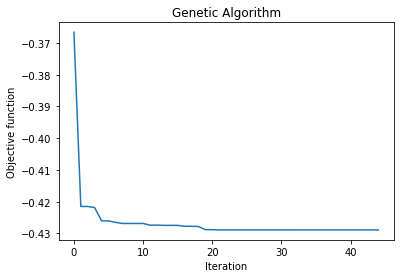


 The best solution found:
 [6.99891404e-01 9.32791369e-05]

 Objective function:
 -0.4288371314065881


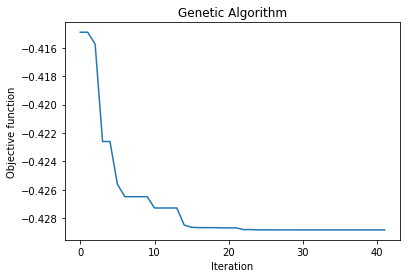


 The best solution found:
 [0.69847183 0.00713936]

 Objective function:
 -0.42879587117464546


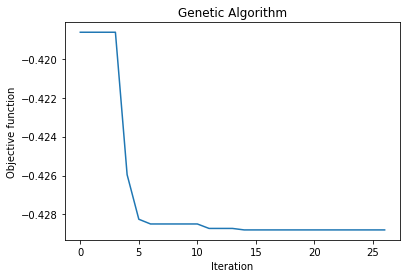


 The best solution found:
 [0.69871216 0.00394689]

 Objective function:
 -0.42881457895184155


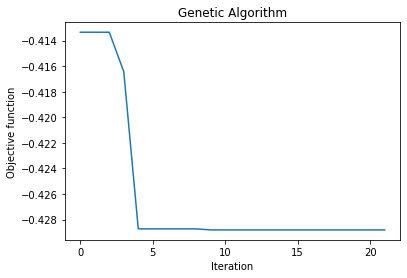


 The best solution found:
 [7.07446628e-01 4.39970056e-04]

 Objective function:
 -0.42888176040795717


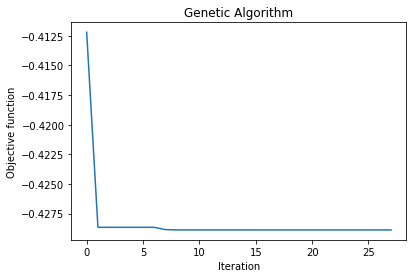


 The best solution found:
 [0.71167321 0.00452722]

 Objective function:
 -0.4288553050413177


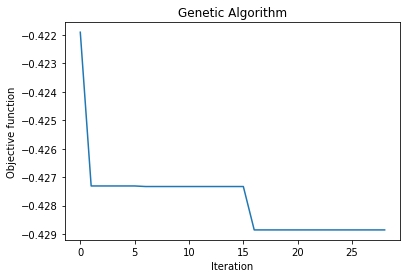


 The best solution found:
 [ 0.70658229 -0.02983001]

 Objective function:
 -0.42850024450796614


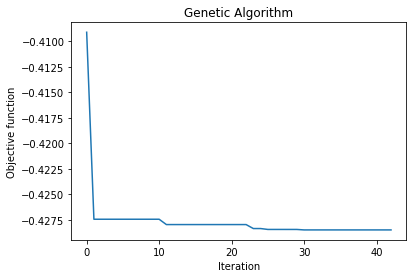


 The best solution found:
 [ 6.90601017e-01 -6.54538746e-04]

 Objective function:
 -0.42864628335536714


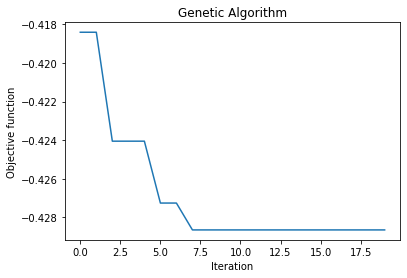


 The best solution found:
 [ 0.72646385 -0.1125182 ]

 Objective function:
 -0.4231719732307591


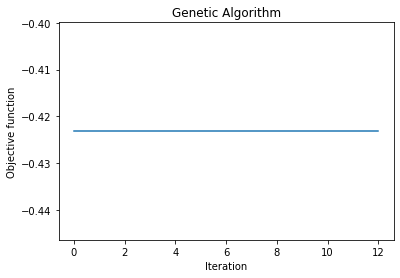


 The best solution found:
 [0.70899297 0.03268105]

 Objective function:
 -0.42842107342191305


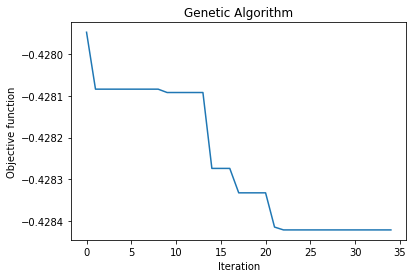


 The best solution found:
 [0.72216756 0.12601238]

 Objective function:
 -0.4219353427892471


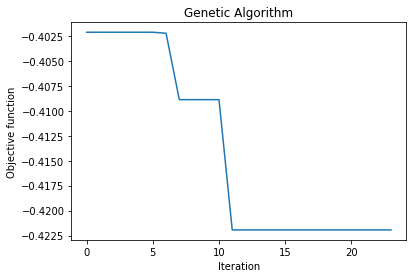


 The best solution found:
 [0.65566083 0.01092235]

 Objective function:
 -0.4265088881486181


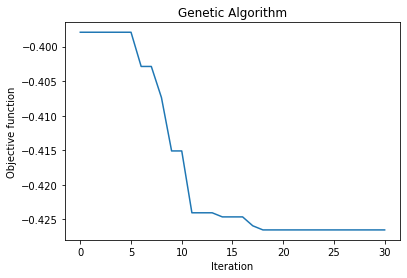


 The best solution found:
 [ 0.70866865 -0.01021703]

 Objective function:
 -0.4288350841144162


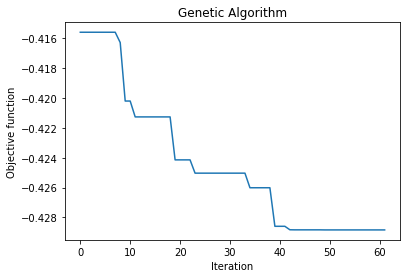


 The best solution found:
 [0.70271059 0.01012033]

 Objective function:
 -0.4288214080955365


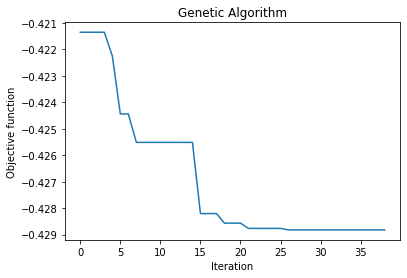


 The best solution found:
 [ 0.67409666 -0.00510935]

 Objective function:
 -0.4279220703824391


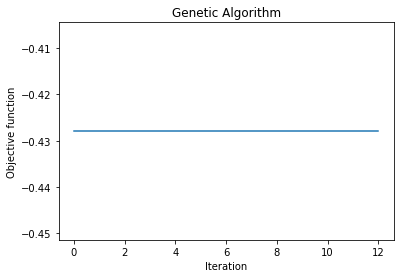


 The best solution found:
 [ 0.70634998 -0.00126396]

 Objective function:
 -0.4288807658432426


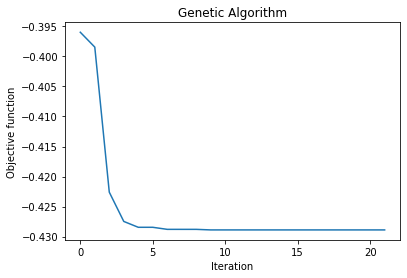


 The best solution found:
 [0.71094699 0.01640713]

 Objective function:
 -0.428753882291406


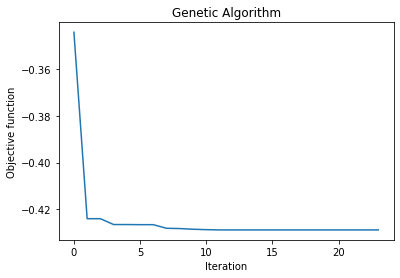


 The best solution found:
 [0.71219821 0.00397875]

 Objective function:
 -0.42885297165333963


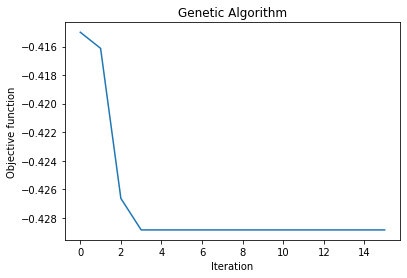


 The best solution found:
 [0.72514336 0.00986071]

 Objective function:
 -0.4285636407655441


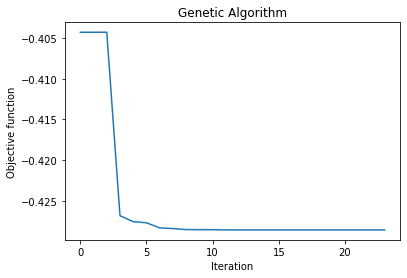


 The best solution found:
 [7.07351023e-01 8.08179915e-06]

 Objective function:
 -0.42888189128897


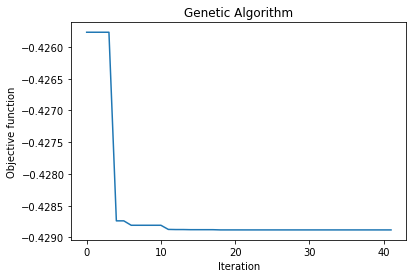


 The best solution found:
 [0.71274901 0.01126514]

 Objective function:
 -0.4288002892166686


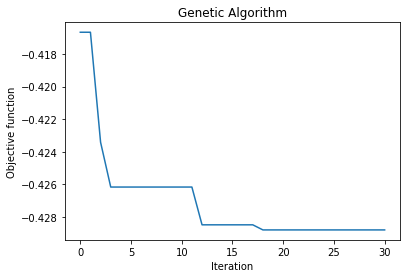


 The best solution found:
 [ 7.06035305e-01 -3.98314587e-05]

 Objective function:
 -0.4288809565370423


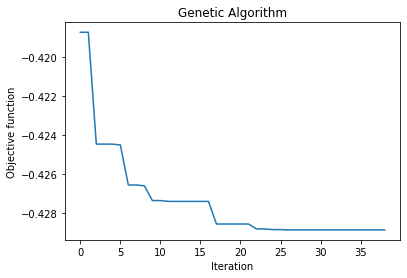


 The best solution found:
 [ 0.71161623 -0.02173962]

 Objective function:
 -0.4286618988363979


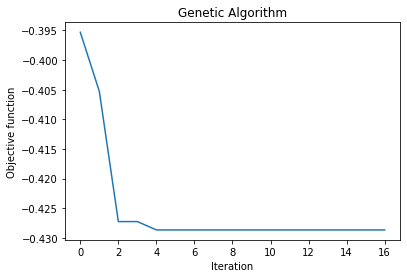


 The best solution found:
 [0.7072304 0.0007177]

 Objective function:
 -0.4288817084617304


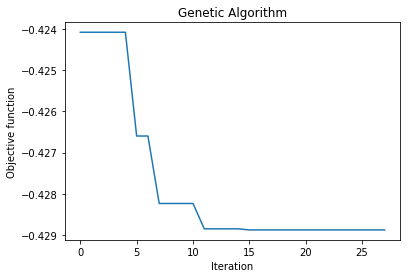


 The best solution found:
 [0.7122111  0.00272921]

 Objective function:
 -0.4288564538870382


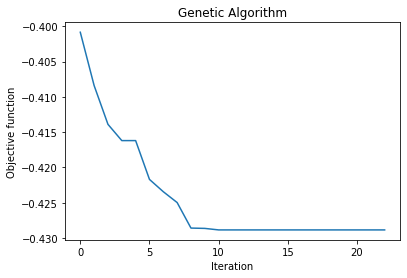

In [ ]:
rodadas = 10
  # a = ['one_point','uniform']
  # b = [0,0.01]
funcao_func_3_1 = ga_f(rodadas,func=f_func, cross='one_point', elite=0.01 ) 

funcao_func_3_2 = ga_f(rodadas,func=f_func, cross='one_point', elite=0.20 ) 

funcao_func_3_3 = ga_f(rodadas,func=f_func, cross='uniform', elite=0.01 ) 

funcao_func_3_4 = ga_f(rodadas,func=f_func, cross='uniform', elite=0.20 ) 

In [ ]:
bundao          = [funcao_func_3_1, funcao_func_3_2, funcao_func_3_3, funcao_func_3_4]
n               = 0
dados_box_3_1   = []
dados_bolinha_3 = []
dados_tabela_3  = []
interacoes_3    = []


for fut in bundao: 
  n           += 1
  b            = list()
  dados_box_3  = []

  for i in range(0, rodadas):   
    b.append(fut[i][0]['function'])
    dados_box_3.append(fut[i][1])
    #print('\niterações para convergir: '+str(fut[i][1])+'\tda rodada n: '+str(i+1))
  
  print('\nTopologia: '+str(n))
  print('todos os melhores Z(x,y): '+str(b)+'\n')
  print('indice do valor min: '+str(b.index(min(b))))
  print('\nx, y, z min: '+str(fut[b.index(min(b))][0])+'\n')
  print('interações para convergir em cada rodada: '+str(dados_box_3))
  print(100*'-'+3*'\n')
  dados_box_3_1.append(dados_box_3)
  dados_bolinha_3.append(fut[b.index(min(b))][0]['variable'])
  dados_tabela_3.append(fut[b.index(min(b))][0]['function'])
  interacoes_3.append(dados_box_3)
  



Topologia: 1
todos os melhores Z(x,y): [-0.42855713440213233, -0.4273633869011372, -0.42871025703807913, -0.42769383505522124, -0.42881215624171326, -0.42882545197016775, -0.42886995246111675, -0.4284729858189632, -0.4288614037280015, -0.42843010780775526]

indice do valor min: 6

x, y, z min: {'variable': array([ 0.70637205, -0.00518429]), 'function': -0.42886995246111675}

interações para convergir em cada rodada: [15, 17, 30, 21, 3, 9, 37, 23, 41, 31]
----------------------------------------------------------------------------------------------------




Topologia: 2
todos os melhores Z(x,y): [-0.4288782244016034, -0.4288664834460847, -0.428880303225849, -0.42829793101701497, -0.4287131078536027, -0.42888017819399743, -0.4288371314065881, -0.42879587117464546, -0.42881457895184155, -0.42888176040795717]

indice do valor min: 9

x, y, z min: {'variable': array([7.07446628e-01, 4.39970056e-04]), 'function': -0.42888176040795717}

interações para convergir em cada rodada: [16, 13, 34,

In [ ]:
dados = [dados_bolinha_1, dados_bolinha_2, dados_bolinha_3]

#listas usadas
xzinho=list()
yzinho=list()

for bolinha in dados:
  #listas auxiliares
  coordx=list()
  coordy=list()
  
  for i in range (0, 4):
    coordx.append(bolinha[i][0])
    coordy.append(bolinha[i][1])
  xzinho.append(coordx)
  yzinho.append(coordy)
  
  

# Plot

In [ ]:
def plot(f, title, step= np.mgrid[-5: 5:5/100,-5:5:5/100], template="none", **kwargs):	
	'''
		title: nome do gráfico 
		posições das bolinhas: x1...x3, y1...y3
		nome das bolinhas: name1...name3
		template: fundo do grafico
	'''
	X1, Y1 = kwargs.get('X1'), kwargs.get('Y1')
	name1 = kwargs.get('name1')
	X2, Y2 = kwargs.get('X2'), kwargs.get('Y2')
	name2 = kwargs.get('name2')
	X3, Y3 = kwargs.get('X3'), kwargs.get('Y3')
	name3 = kwargs.get('name3')
	X4,Y4 = kwargs.get('X4'),kwargs.get('Y4')
	name4 = kwargs.get('name4')	
	
	
	x, y 	= step
	z 		= f(x,y)

	fig 	= go.Figure()
	fig.add_trace(go.Surface(x=x, y=y, z=z,  surfacecolor=0.07*z, visible=True,
									showscale=False, opacity=0.4,
									name=title,

									contours = {
									"x": {"show": True, "color":"white"},
									"y": {"show": True,"color":"green"},
									"z": {"show": True,"color":"black"}}))


	x1, y1, z1 =  np.array([X1]),  np.array([Y1]), np.array([grafic_func(X1, Y1)])

	x2, y2, z2 =  np.array([X2]),  np.array([Y2]), np.array([grafic_func(X2, Y2)])

	x3, y3, z3 =  np.array([X3]),  np.array([Y3]), np.array([grafic_func(X3, Y3)])
 
	x4, y4, z4 =  np.array([X4]),  np.array([Y4]), np.array([grafic_func(X4, Y4)])

	fig.add_traces(data=[go.Scatter3d(
			x=x1,
			y=y1,
			z=z1,
			mode='markers',
			visible=True,
				showlegend=True,
				name=name1,
				marker=dict(
					size=5,
					color='red',   # choose a colorscale
					opacity=1
			)
	)])

	fig.add_traces(data=[go.Scatter3d(
			x=x2,
			y=y2,
			z=z2,
			mode='markers',
			visible=True,
				showlegend=True,
				name=name2,
				marker=dict(
					size=5,
					color='green',   # choose a colorscale
					opacity=1
			)
	)])

	fig.add_traces(data=[go.Scatter3d(
			x=x3,
			y=y3,
			z=z3,
			mode='markers',
			visible=True,
				showlegend=True,
				name=name3,
				marker=dict(
					size=5,
					color='blue',   # choose a colorscale
					opacity=1
			)
	)])
 
	fig.add_traces(data=[go.Scatter3d(
			x=x4,
			y=y4,
			z=z4,
			mode='markers',
			visible=True,
				showlegend=True,
				name=name4,
				marker=dict(
					size=5,
					color='yellow',   # choose a colorscale
					opacity=1
			)
	)])

	fig.update_layout(width=700, height=400, showlegend=True,
				title=title,
				xaxis_rangeslider_visible=False,
				template=template,
				margin=dict(r=10, t=25, b=40, l=60),
				annotations=[
						dict(
								text="Source: Furquim e Nazário",
								showarrow=False,
								xref="paper",
								yref="paper",
								x=1.2,
								y=0)])  


	fig.show()
	return fig

In [ ]:
def grafic_Schwefel(x, y):
  dim = 2
  z = 0 
  z = (x * np.sin( np.sqrt( np.abs(x)))) + (y * np.sin( np.sqrt( np.abs(y))))
  z = (418.9829 * dim) - z    
  return z

In [ ]:
def grafic_Rastrigin(x, y):
  z =20+ x**2 + y**2 - 10 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))
  return z

In [ ]:
def grafic_func(x, y):
  z = 0 
  z = x**2 + y**2
  z = x*np.exp(-z)       
  return z

In [ ]:
superf1 = plot(grafic_Schwefel, title='Superfície 1 - Função de Schwefel', 
     step= np.mgrid[-500: 500: 2, -500: 500: 2], 
     X1=xzinho[0][0], Y1=yzinho[0][0], X2=xzinho[0][1], Y2=yzinho[0][1],
     X3=xzinho[0][2], Y3=yzinho[0][2], X4=xzinho[0][3], Y4=yzinho[0][3],  
     name1='ponto 1', name2='ponto 2', name3='ponto 3', name4='ponto 4')

In [ ]:
superf2 = plot(grafic_Rastrigin, title='Superfície 2 - Função de Rastrigin', 
     step= np.mgrid[-5: 5: 5/100,-5: 5: 5/100], 
     X1=xzinho[1][0], Y1=yzinho[1][0], X2=xzinho[1][1], Y2=yzinho[1][1],
     X3=xzinho[1][2], Y3=yzinho[1][2], X4=xzinho[1][3], Y4=yzinho[1][3],       
     name1='ponto 1', name2='ponto 2', name3='ponto 3', name4='ponto 4')

In [ ]:
superf3 = plot(grafic_func, title='Superfície 3', 
     step= np.mgrid[-2: 2: 5/100,-2: 2: 5/100], 
     X1=xzinho[2][0], Y1=yzinho[2][0], X2=xzinho[2][1], Y2=yzinho[2][1],
     X3=xzinho[2][2], Y3=yzinho[2][2], X4=xzinho[2][3], Y4=yzinho[2][3],        
     name1='ponto 1', name2='ponto 2', name3='ponto 3', name4='ponto 4')

# Box Plot

##Função Box_plot

In [ ]:
def Box_plot(dados,titulo='title'):
  
  x_data = ['1','2','3','4']

  y0 = dados[0]
  
  y1 = dados[1]
  
  y2 = dados[2]
  
  y3 = dados[3]

  y_data = [y0, y1, y2, y3]

  colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
            'rgba(255, 65, 54, 0.5)']

  fig = go.Figure()

  for xd, yd, cls in zip(x_data, y_data, colors):
          fig.add_trace(go.Box(showlegend=True,
                              y=(yd*100),
                              name=xd))

  fig.update_layout(width=700, height=400,
      yaxis_title='Número de Iterações',
      xaxis_title='Topologias - GA',
      title=titulo,
      template="simple_white",
      yaxis=dict(showgrid=True,), 
      xaxis=dict(showgrid=True,),
      margin=dict(l=30, r=30, b=50, t=50,),
      paper_bgcolor='rgb(223, 223, 223)',
      plot_bgcolor='rgb(223, 223, 223)',
      showlegend=True,
      annotations=[dict(text="Source: Furquim e Nazário",
                        showarrow=False,
                        xref="paper",
                        yref="paper",
                        x=1,
                        y=-0.15)])
  fig.show()
  return fig

##Resultados Box Plot

In [ ]:
Box1 = Box_plot(dados_box_1_1,titulo='Função de Schwefel')


In [ ]:
Box2 = Box_plot(dados_box_2_1, titulo='Função de Rastrigin')

In [ ]:
Box3 = Box_plot(dados_box_3_1,titulo='Função 3')

In [ ]:
tabela1 = go.Figure(data=[go.Table(header=dict(values=['Função', 'Topologia1','Topologia2','Topologia3','Topologia4']),
                 cells=dict(values=[['Schwefel/Minimização', 'Rastrigin/Minimização', 'Função/Maximização'], 
                                    [round(dados_tabela_1[0],10),round(dados_tabela_2[0],10),round(-dados_tabela_3[0],10)],
                                    [round(dados_tabela_1[1],10),round(dados_tabela_2[1],10),round(-dados_tabela_3[1],10)],
                                    [round(dados_tabela_1[2],10),round(dados_tabela_2[2],10),round(-dados_tabela_3[2],10)],
                                    [round(dados_tabela_1[3],10),round(dados_tabela_2[3],10),round(-dados_tabela_3[3],10)]]))])
tabela1.update_layout(width=850, height=195,
    yaxis_title='Número de Iterações',
    xaxis_title='Topologias - GA',
    title='Melhores Resultados por Topologia',
    template="simple_white",
    yaxis=dict(showgrid=True,), 
    xaxis=dict(showgrid=True,),
    margin=dict(l=30, r=30, b=50, t=50,),
    paper_bgcolor='rgb(223, 223, 223)',
    plot_bgcolor='rgb(223, 223, 223)',
    showlegend=True,
    annotations=[dict(text="Source: Furquim e Nazário",
                      showarrow=False,
                      xref="paper",
                      yref="paper",
                      x=1,
                      y=-0.15)])
#tabela2.write_html('/content/sample_data/ALGORITMO GENETICO/AAA.html', auto_open=True)




In [ ]:
inter   = [interacoes_1, interacoes_2, interacoes_3]
converg = []
media   = []

for vet in inter:
  for i in range (0,4):
    media.append(sum(vet[i])/len(vet[i]))
  converg.append(media)
  media=[] 
  
tabela2 = go.Figure(data=[go.Table(header=dict(values=['Função', 'Topologia1','Topologia2','Topologia3','Topologia4']),
                 cells=dict(values=[['Schwefel', 'Rastrigin', 'Função'], 
                                    [converg[0][0],converg[1][0],converg[2][0]],
                                    [converg[0][1],converg[1][1],converg[2][1]],
                                    [converg[0][2],converg[1][2],converg[2][2]],
                                    [converg[0][3],converg[1][3],converg[2][3]]]))])
tabela2.update_layout(width=500, height=300)

tabela2.update_layout(width=500, height=195,
    yaxis_title='Número de Iterações',
    xaxis_title='Topologias - GA',
    title='Média de Interações para Convergência',
    template="simple_white",
    yaxis=dict(showgrid=True,), 
    xaxis=dict(showgrid=True,),
    margin=dict(l=30, r=30, b=50, t=50,),
    paper_bgcolor='rgb(223, 223, 223)',
    plot_bgcolor='rgb(223, 223, 223)',
    showlegend=True,
    annotations=[dict(text="Source: Furquim e Nazário",
                      showarrow=False,
                      xref="paper",
                      yref="paper",
                      x=1,
                      y=-0.15)])
#tabela2.write_html('/content/sample_data/ALGORITMO GENETICO/AAA.html', auto_open=True)
tabela2.show()



#HTML

In [ ]:
endereco = '/content/drive/My Drive/8° Período/Meta/lista/gráficos lista 1/'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
tabela0.write_html(endereco+'Tables.html', auto_open=True)
with open(endereco+'Tables.html', 'a') as f:
  f.write(tabela1.to_html(full_html=False, include_plotlyjs='cdn'))
  f.write(tabela2.to_html(full_html=False, include_plotlyjs='cdn'))

In [ ]:
Box1.write_html(endereco+'Box.html', auto_open=True)
with open(endereco+'Box.html', 'a') as f:
    f.write(Box2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(Box3.to_html(full_html=False, include_plotlyjs='cdn'))

In [ ]:
superf1.write_html(endereco+'Surfaces.html', auto_open=True)
with open(endereco+'Surfaces.html', 'a') as f:
    f.write(superf2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(superf3.to_html(full_html=False, include_plotlyjs='cdn'))